<a href="https://colab.research.google.com/github/prasanna2019/StockAnalysis/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##We have stock price data in csv format file. Let us start by importing pandas and creating a dataframe by reading the file.

In [89]:
import pandas as pd

In [90]:
df= pd.read_csv("https://raw.githubusercontent.com/prasanna2019/StockDataAnalysis/refs/heads/main/HZNC%20Historical%20Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,22-05-2024,781.55,778.00,804.9,767.90,8.77M,5.10%
1,21-05-2024,743.60,632.80,743.6,626.15,15.46M,19.99%
2,18-05-2024,619.70,596.00,619.7,596.00,1.09M,5.00%
3,17-05-2024,590.20,584.75,619.1,578.40,6.52M,1.18%
4,16-05-2024,583.30,566.50,589.0,556.50,5.21M,4.00%


In [91]:
df.dtypes  # Checking data types of all columns

,0
Date,object
Price,float64
Open,float64
High,float64
Low,float64
Vol.,object
Change %,object


In [92]:
df['Date'] = pd.to_datetime(df['Date']) # Converting Date column from object to datetime.
df['Date'].dtype

<ipython-input-92-93401e03f1bf>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date']) # Converting Date column from object to datetime.


dtype('<M8[ns]')

In [93]:
df.sort_values(by= 'Date', ascending= False, inplace= True) #Sorting data based on date values
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-05-22,781.55,778.00,804.90,767.90,8.77M,5.10%
1,2024-05-21,743.60,632.80,743.60,626.15,15.46M,19.99%
2,2024-05-18,619.70,596.00,619.70,596.00,1.09M,5.00%
3,2024-05-17,590.20,584.75,619.10,578.40,6.52M,1.18%
4,2024-05-16,583.30,566.50,589.00,556.50,5.21M,4.00%
...,...,...,...,...,...,...,...
2563,2014-01-07,99.45,100.94,101.62,98.18,1.51M,-1.25%
2564,2014-01-06,100.71,103.00,103.71,99.56,1.65M,-3.11%
2565,2014-01-03,103.94,102.72,105.40,101.77,1.41M,1.19%
2566,2014-01-02,102.72,104.89,105.60,102.36,1.09M,-1.25%


In [94]:
df['Change']= df['Change %'].str.replace('%','').astype('float')   # Changing data type of Change column.
df = df.drop('Change %', axis=1)
df.head()

,Date,Price,Open,High,Low,Vol.,Change
0,2024-05-22,781.55,778.00,804.9,767.90,8.77M,5.10
1,2024-05-21,743.60,632.80,743.6,626.15,15.46M,19.99
2,2024-05-18,619.70,596.00,619.7,596.00,1.09M,5.00
3,2024-05-17,590.20,584.75,619.1,578.40,6.52M,1.18
4,2024-05-16,583.30,566.50,589.0,556.50,5.21M,4.00


In [95]:
df.describe()  # Understanding the data

,Date,Price,Open,High,Low,Change
count,2568,2568.000000,2568.000000,2568.000000,2568.000000,2568.000000
mean,2019-03-15 03:28:35.887850496,241.471437,241.723544,245.181336,238.098851,0.101020
min,2014-01-01 00:00:00,91.440000,91.090000,92.860000,90.530000,-10.720000
25%,2016-08-09 18:00:00,165.687500,167.000000,169.787500,164.037500,-0.970000
50%,2019-03-13 12:00:00,265.900000,266.405000,269.750000,262.625000,0.000000
75%,2021-10-19 06:00:00,308.162500,308.325000,311.962500,305.000000,1.050000
max,2024-05-22 00:00:00,781.550000,778.000000,804.900000,767.900000,19.990000
std,NaN,81.088059,80.759803,82.178888,79.697953,2.139808


In [96]:
df[df.duplicated()] # Checking for duplicate columns

,Date,Price,Open,High,Low,Vol.,Change


In [97]:
df_dates= df[df.duplicated(subset= 'Date')] # Checking for rows with duplicate dates
df_dates

,Date,Price,Open,High,Low,Vol.,Change


In [98]:
df.isna().sum()   # Checking for null values in all columns

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1
Change,0


In [99]:
df[df['Vol.'].isna()]

,Date,Price,Open,High,Low,Vol.,Change
1134,2019-10-27,216.95,216.95,216.95,216.95,NaN,2.77


In [100]:
df.dropna(inplace= True)  #Dropping rows with null values as seen above.

In [101]:
df[df['Vol.'].isna()]

,Date,Price,Open,High,Low,Vol.,Change


In [102]:
print(df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change']].describe())


             Price         Open         High          Low       Change
count  2567.000000  2567.000000  2567.000000  2567.000000  2567.000000
mean    241.480989   241.733194   245.192333   238.107090     0.099981
std      81.102412    80.774057    82.193009    79.712387     2.139576
min      91.440000    91.090000    92.860000    90.530000   -10.720000
25%     165.625000   167.000000   169.675000   164.025000    -0.970000
50%     265.900000   266.450000   269.800000   262.650000     0.000000
75%     308.175000   308.350000   311.975000   305.000000     1.050000
max     781.550000   778.000000   804.900000   767.900000    19.990000


<Axes: title={'center': 'Stock price over time'}, xlabel='Date'>

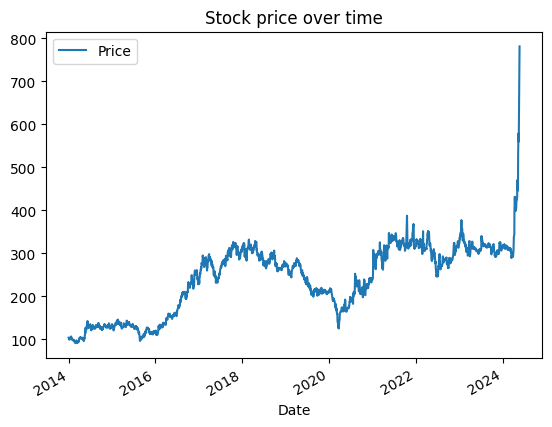

In [103]:
df.plot(y= 'Price', x= 'Date', title='Stock price over time')

In [104]:
df['Daily_Return'] = df['Price'].pct_change() # Percentage change in price values based on previous day value.
print([df['Daily_Return'], df['Price']])

[0            NaN
1      -0.048557
2      -0.166622
3      -0.047604
4      -0.011691
          ...   
2563   -0.029945
2564    0.012670
2565    0.032072
2566   -0.011738
2567    0.012656
Name: Daily_Return, Length: 2567, dtype: float64, 0       781.55
1       743.60
2       619.70
3       590.20
4       583.30
         ...  
2563     99.45
2564    100.71
2565    103.94
2566    102.72
2567    104.02
Name: Price, Length: 2567, dtype: float64]


In [105]:
df['month']= df['Date'].dt.month # Month column

In [106]:
df

,Date,Price,Open,High,Low,Vol.,Change,Daily_Return,month
0,2024-05-22,781.55,778.00,804.90,767.90,8.77M,5.10,NaN,5
1,2024-05-21,743.60,632.80,743.60,626.15,15.46M,19.99,-0.048557,5
2,2024-05-18,619.70,596.00,619.70,596.00,1.09M,5.00,-0.166622,5
3,2024-05-17,590.20,584.75,619.10,578.40,6.52M,1.18,-0.047604,5
4,2024-05-16,583.30,566.50,589.00,556.50,5.21M,4.00,-0.011691,5
...,...,...,...,...,...,...,...,...,...
2563,2014-01-07,99.45,100.94,101.62,98.18,1.51M,-1.25,-0.029945,1
2564,2014-01-06,100.71,103.00,103.71,99.56,1.65M,-3.11,0.012670,1
2565,2014-01-03,103.94,102.72,105.40,101.77,1.41M,1.19,0.032072,1
2566,2014-01-02,102.72,104.89,105.60,102.36,1.09M,-1.25,-0.011738,1


In [107]:
df['year']= df['Date'].dt.year                   # Year column
std= df.groupby('year')['Price'].std()           # Standard deviation to see how much the price value varies in a year.
std

,Price
year,
2014,15.172009
2015,11.024270
2016,43.274398
2017,23.863111
2018,19.086252
2019,27.073576
2020,27.992236
2021,22.425281
2022,24.076537


In [108]:
annual_stats = df.groupby('year')['Price'].agg(['mean', 'std']) # Standard deviation and mean comparison
annual_stats

,mean,std
year,,
2014,118.189631,15.172009
2015,125.475524,11.024270
2016,179.380202,43.274398
2017,282.169113,23.863111
2018,292.057114,19.086252
2019,237.912090,27.073576
2020,199.538247,27.992236
2021,315.870161,22.425281
2022,299.717339,24.076537


In [109]:
df.set_index('Date', inplace= True)  # Seting date as index for plotting.

<Axes: title={'center': 'Stock Price Over Time'}, xlabel='Year', ylabel='Price'>

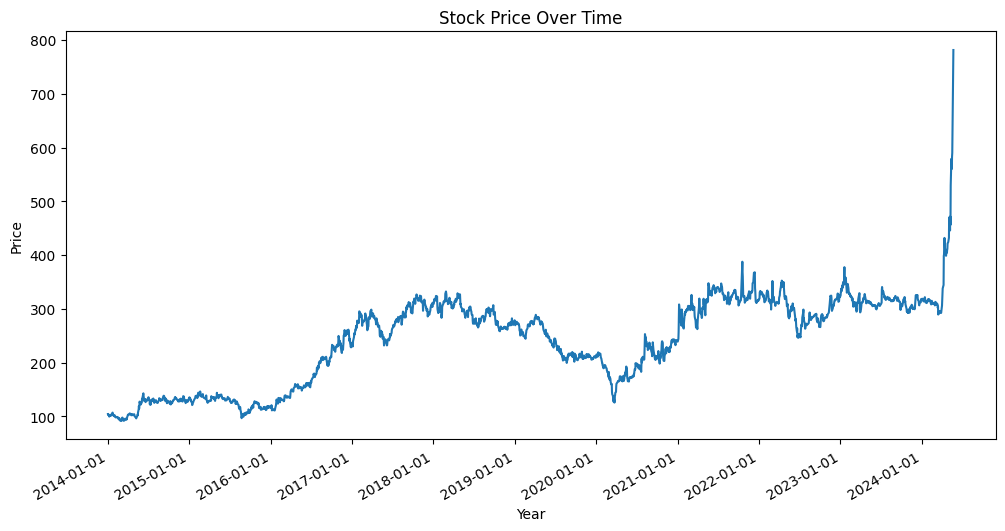

In [110]:
ax= df['Price'].plot(figsize=(12, 6), title='Stock Price Over Time') # Change in price on yearly basis. Shows growth of the stock.
ax.set_xlabel("Year")
ax.set_ylabel("Price")
ax.set_xticks(pd.date_range(start= df.index.min(), end= df.index.max(), freq='YS'))
ax
